WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Mean of both groups: 0.7589700781741396
Standard Deviation of both groups: 0.2314658145638596


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mean_group1, mean_group2, std_group1, std_group2]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 11 seconds.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.


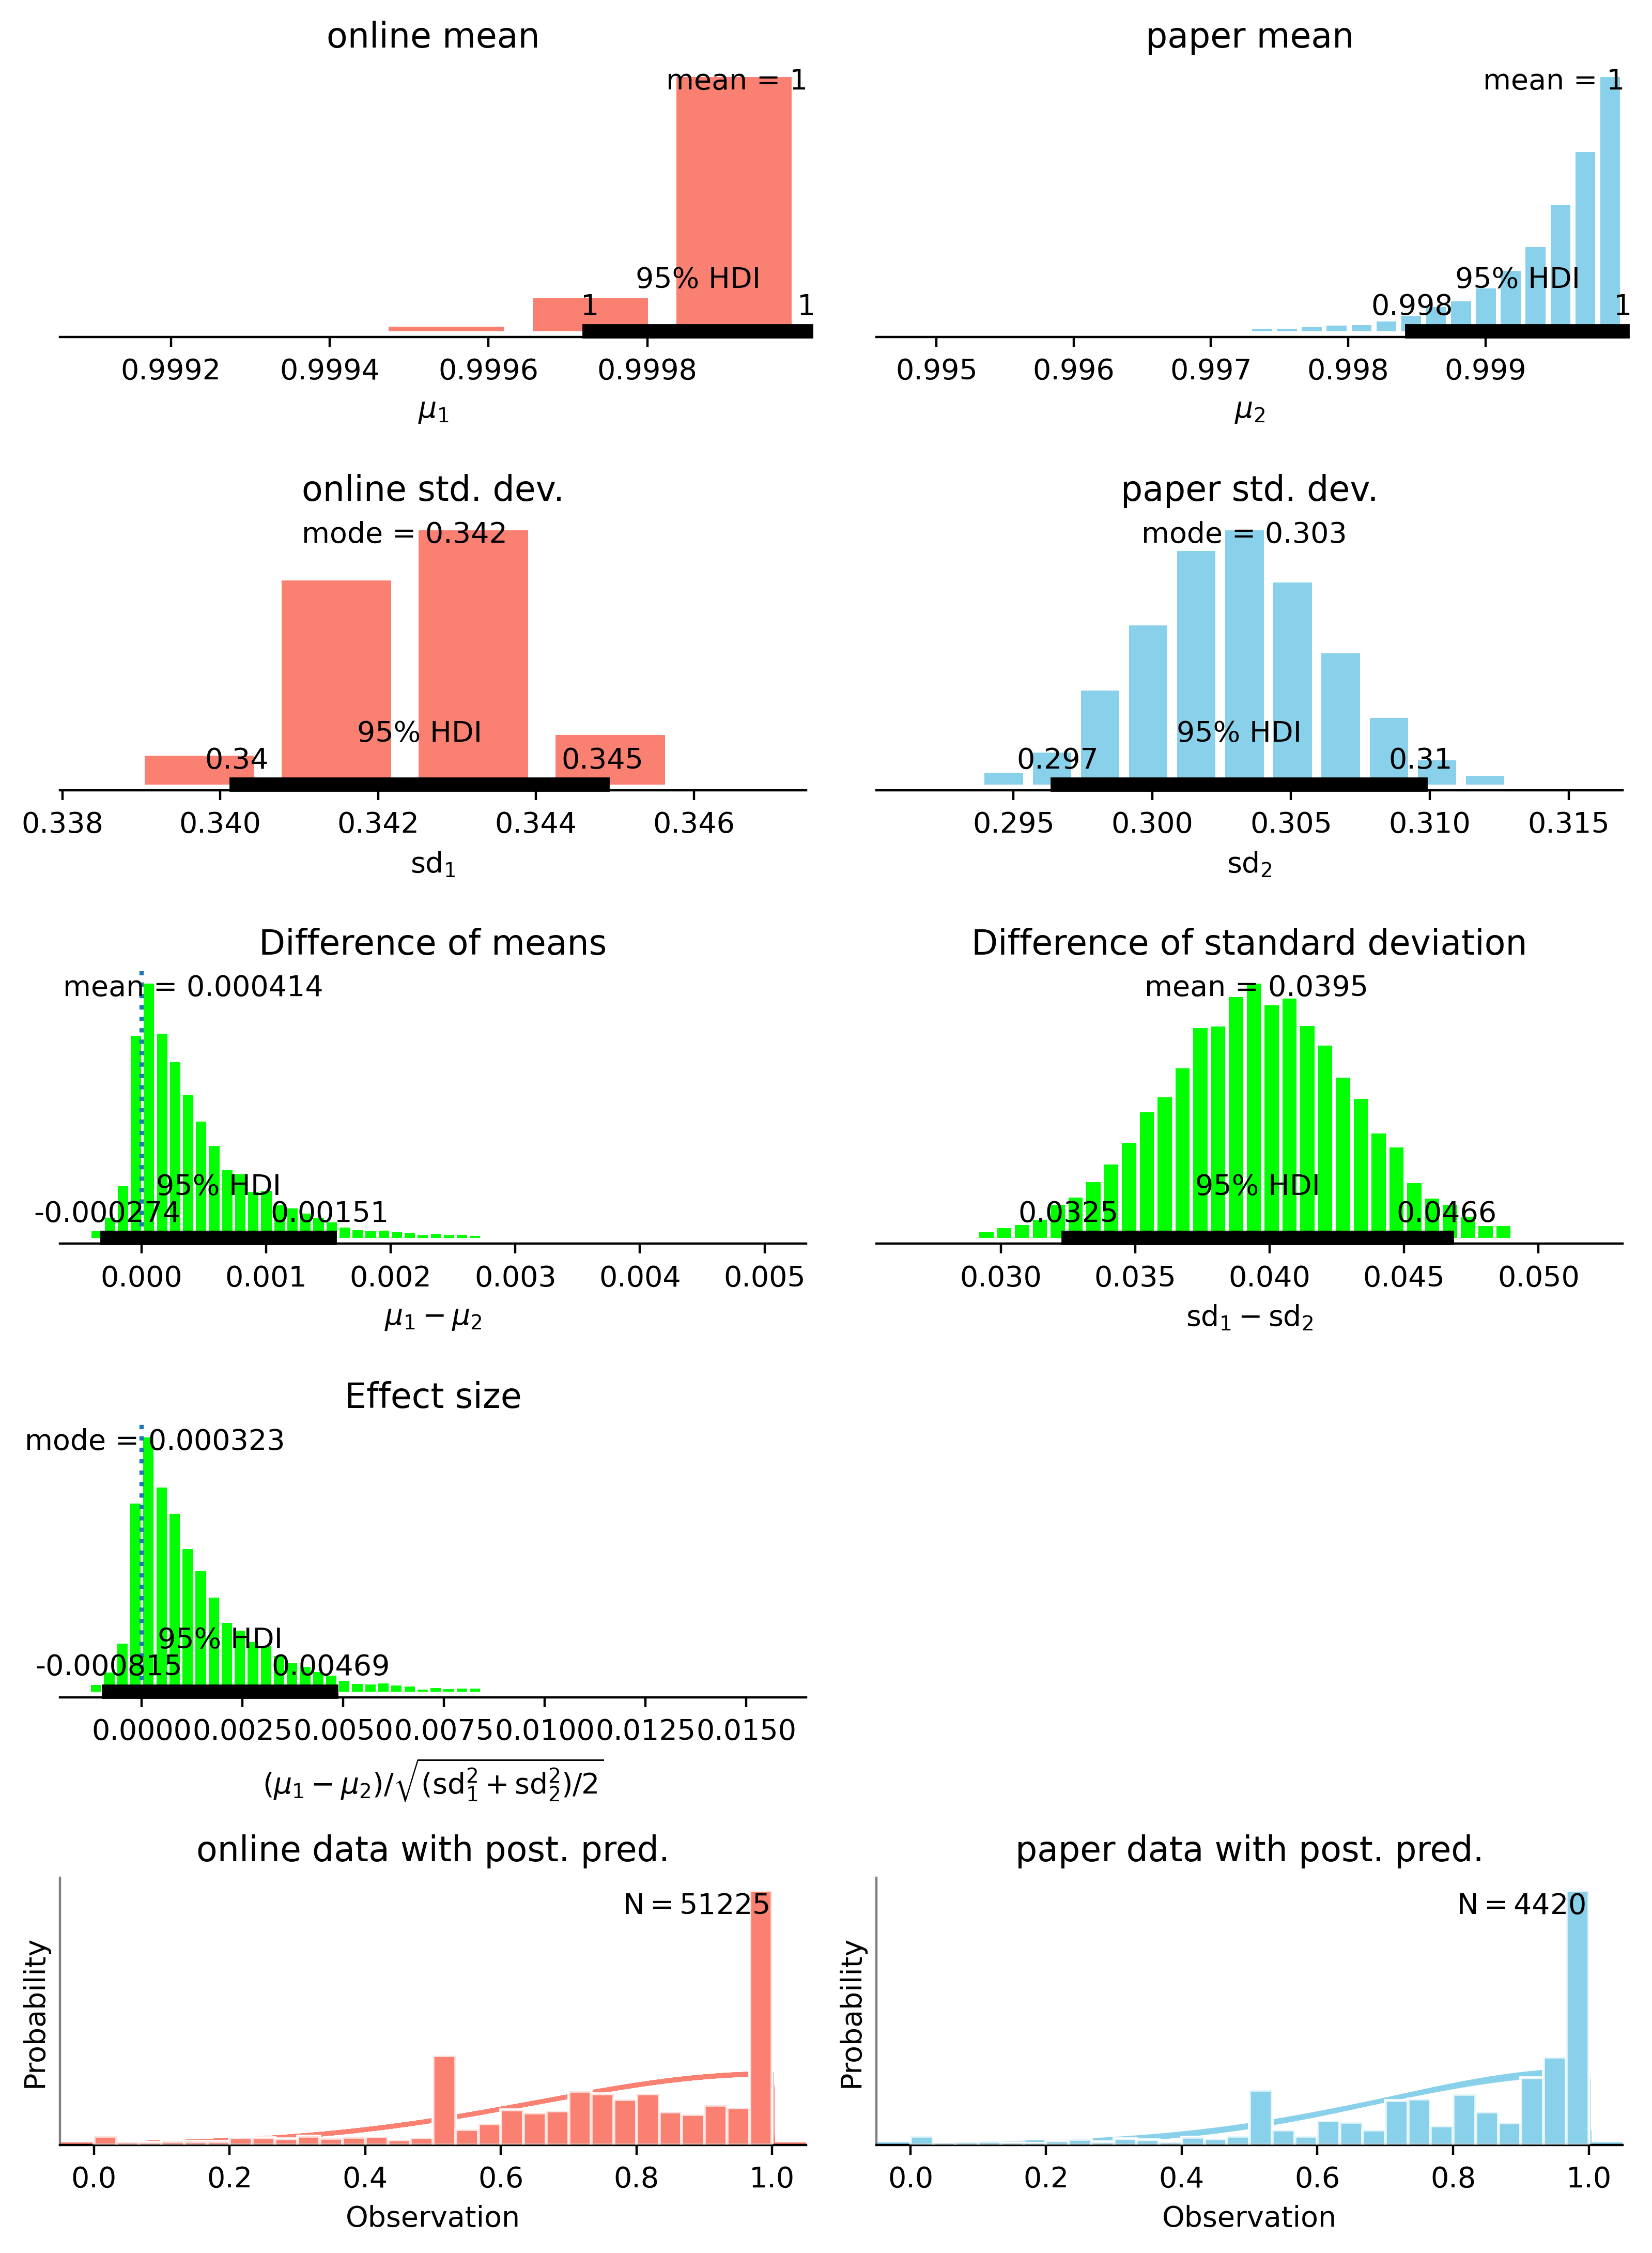

In [1]:
from bayes_test import BayesianHypothesisTestTruncNorm
import pandas as pd
import numpy as np

draws = 2000

online = np.load('online_distinctiveness.npy')

paper = np.load('paper_distinctiveness.npy')


df1 = pd.DataFrame({'value' : paper})
df2 = pd.DataFrame({'value' : online})
df1['del_type'] = 'paper'
df2['del_type'] = 'online'

df = pd.concat([df1,df2])

study_test = BayesianHypothesisTestTruncNorm(df=df,
                                   group1_name='online',
                                   group2_name='paper',
                                   value_column='value',
                                   category_column='del_type',
                                   lower=0,
                                   upper=1)
study_test.run_model(draws)
study_test.plot_results()

In [2]:
# This will computer various effect sizes
#study_test.cliff_delta()
study_test.proportion_difference()
study_test.overlap_proportion()
#study_test.divergence_effect_size()
study_test.value_storage

Sampling: [Group 1 data, Group 2 data]


{'mean_group1': {'mean': 0.9999129114761026,
  'hdi_min': 0.999727501902569,
  'hdi_max': 0.9999999948533835},
 'mean_group2': {'mean': 0.9995008570842522,
  'hdi_min': 0.9984673979527287,
  'hdi_max': 0.9999999958905801},
 'std_group1': {'mode': 0.3423349126999249,
  'hdi_min': 0.3402061778358215,
  'hdi_max': 0.34484161304849614},
 'std_group2': {'mode': 0.3033109633302327,
  'hdi_min': 0.29658588728276725,
  'hdi_max': 0.3096650457367886},
 'diff_means': {'mean': 0.00041372791550048794,
  'hdi_min': -0.0002737856868124666,
  'hdi_max': 0.0015092868498369771},
 'diff_stds': {'mean': 0.03950355848537764,
  'hdi_min': 0.03251277111740847,
  'hdi_max': 0.046584916985949965},
 'Effect size': {'mode': 0.00032297874764321277,
  'hdi_min': -0.0008150588183040801,
  'hdi_max': 0.004694803064761806},
 'prop_difference': {'prop_difference': -0.05990434},
 'overlap_proportion': {'overlap_proportion': 0.8915640488792715}}

In [3]:
import numpy as np
import scipy.stats as stats

def overlap_proportion(mu1, sigma1, a1, b1, mu2, sigma2, a2, b2, resolution=1000):
    # Define the range of values for the integration
    x = np.linspace(min(a1, a2), max(b1, b2), resolution)
    
    # Calculate the PDFs for the two distributions
    pdf1 = stats.truncnorm.pdf(x, (a1 - mu1) / sigma1, (b1 - mu1) / sigma1, loc=mu1, scale=sigma1)
    pdf2 = stats.truncnorm.pdf(x, (a2 - mu2) / sigma2, (b2 - mu2) / sigma2, loc=mu2, scale=sigma2)
    
    # Calculate the overlap by integrating the minimum of the PDFs
    overlap_area = np.trapz(np.minimum(pdf1, pdf2), x)
    
    # Calculate the total area under each PDF
    area1 = np.trapz(pdf1, x)
    area2 = np.trapz(pdf2, x)
    
    # Calculate the proportion of the total area that the overlap represents
    overlap_proportion = overlap_area / (area1 + area2 - overlap_area)
    
    return overlap_proportion

# Define parameters for the two truncated normal distributions
mu1, sigma1 = 1, 0.342
a1, b1 = 0, 1
mu2, sigma2 = 0.999, 0.303
a2, b2 = 0, 1

# Calculate the proportion of the total area that the two distributions overlap
proportion_overlap = overlap_proportion(mu1, sigma1, a1, b1, mu2, sigma2, a2, b2)
print("Proportion of overlap between the two distributions:", proportion_overlap)


Proportion of overlap between the two distributions: 0.8935544142550514
